# Objective

* Identify the Which Platform have more impact on Sales 

* To build the Model which will help to Predict the future sales based on Money invest in Different Platform 

In [2]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### 1. Plot a bar chart showing count of individual species?

In [3]:
new = pd.read_csv(r"C:\Users\shubh\Desktop\Machine Learning\Fish_dataset.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'
new

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

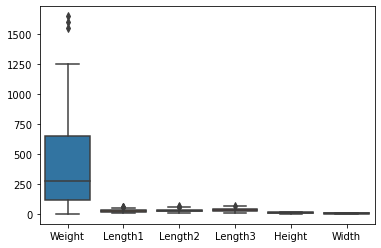

In [5]:
sns.boxplot(data=new)

# Winsorizing Technique -- Treatment of Outlier

In [6]:
q1 = new['Weight'].quantile(0.25)
q3 = new['Weight'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1445.0

In [7]:
new['Weight']=np.where(new['Weight'] > upper_limit,upper_limit,new['Weight']) 

<AxesSubplot:>

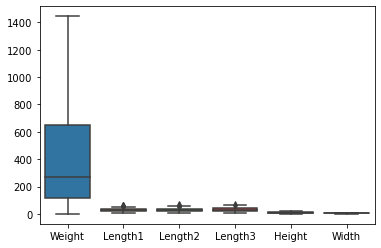

In [8]:
sns.boxplot(data=new)

In [9]:
q1 = new['Length1'].quantile(0.25)
q3 = new['Length1'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

53.175000000000004

In [10]:
new['Length1']=np.where(new['Length1'] > upper_limit,upper_limit,new['Length1']) 

<AxesSubplot:>

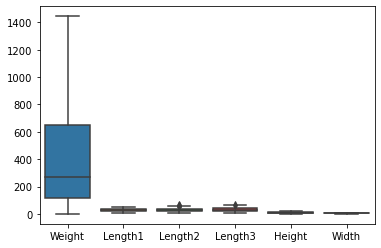

In [11]:
sns.boxplot(data=new)

In [12]:
q1 = new['Length2'].quantile(0.25)
q3 = new['Length2'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

57.25

In [13]:
new['Length2']=np.where(new['Length2'] > upper_limit,upper_limit,new['Length2']) 

<AxesSubplot:>

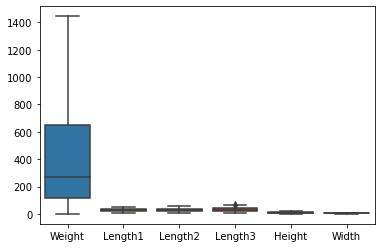

In [14]:
sns.boxplot(data=new)

In [15]:
q1 = new['Length3'].quantile(0.25)
q3 = new['Length3'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

64.40000000000002

In [16]:
new['Length3']=np.where(new['Length3'] > upper_limit,upper_limit,new['Length3']) 

<AxesSubplot:>

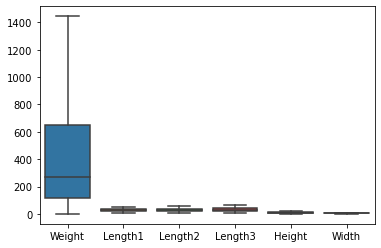

In [17]:
sns.boxplot(data=new)

In [18]:
q1 = new['Height'].quantile(0.25)
q3 = new['Height'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

21.99755

In [19]:
new['Height']=np.where(new['Height'] > upper_limit,upper_limit,new['Height']) 

<AxesSubplot:>

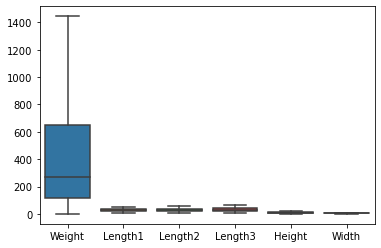

In [20]:
sns.boxplot(data=new)

In [21]:
q1 = new['Width'].quantile(0.25)
q3 = new['Width'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

8.882775

In [22]:
new['Width']=np.where(new['Width'] > upper_limit,upper_limit,new['Width']) 

<AxesSubplot:>

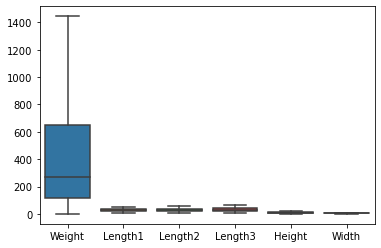

In [23]:
sns.boxplot(data=new)

In [24]:
new.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,395.401887,26.175000,28.342453,31.204403,8.970994,4.417486
std,348.555952,9.782457,10.499859,11.541386,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1445.000000,53.175000,57.250000,64.400000,18.957000,8.142000


In [25]:
new.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [26]:
new=new.drop(['Species'],axis=1)

In [27]:
new.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [28]:
# Putting feature variable to X
X = new.drop('Weight', axis= 1)

# Putting response variable to y
y = new[['Weight']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [29]:
df= pd.concat([y_train, X_train], axis=1)
df.head()

,Weight,Length1,Length2,Length3,Height,Width
3,363.0,26.3,29.0,33.5,12.7300,4.4555
113,700.0,34.0,36.0,38.3,10.6091,6.7408
85,130.0,19.3,21.3,22.8,6.3840,3.5340
155,13.4,11.7,12.4,13.5,2.4300,1.2690
76,70.0,15.7,17.4,18.5,4.5880,2.9415


# Correlation Matrix

In [30]:
new.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.911859,0.915150,0.922441,0.741635,0.898874
Length1,0.911859,1.000000,0.999503,0.991943,0.636902,0.875426
Length2,0.915150,0.999503,1.000000,0.993990,0.651566,0.881426
Length3,0.922441,0.991943,0.993990,1.000000,0.706758,0.880175
Height,0.741635,0.636902,0.651566,0.706758,1.000000,0.792881
Width,0.898874,0.875426,0.881426,0.880175,0.792881,1.000000


<AxesSubplot:>

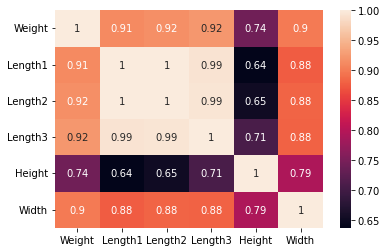

In [31]:
sns.heatmap(new.corr(),annot = True)

<AxesSubplot:title={'center':'Weight vs Length1'}, xlabel='Length1', ylabel='Weight'>

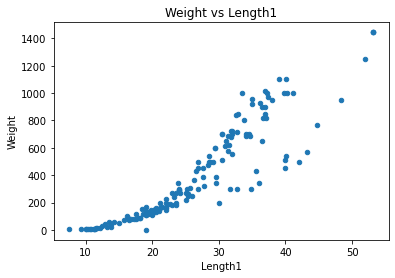

In [32]:
new.plot.scatter(x='Length1', y='Weight', title='Weight vs Length1')

# Length2 have 92%  strong positve correlation with Weight

* Length2 have high impact on Weight
* There is no colinearity in data, So every platform is independent 

# ### Multicolinearity (with the help of VIF)

In [37]:
X1=df.drop(['Weight'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Length1    11053.803994
Length2    14067.147068
Length3     2213.639114
Height        47.526806
Width         84.824206
dtype: float64

#  Model Building

*  H0 :- There is no Linear relationship between Weight and Length2

* Vs 

*  H1 :- There is Linear relationship between Weight and Length2

Alpha = 0.05 (5%)

In [38]:
import statsmodels.formula.api as smf
model = smf.ols('Weight ~  Length1 + Length2 + Length3 + Height + Width',data=new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     241.1
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.21e-70
Time:                        12:30:11   Log-Likelihood:                -982.25
No. Observations:                 159   AIC:                             1977.
Df Residuals:                     153   BIC:                             1995.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -499.1475     28.162    -17.724      0.000    -554.784    -443.511
Length1       50.1675     38.420      1.306      0.194     -25.734     126.069
Length2      -55.6094     40.466     -1.374      0.171    -135.553      24.334
Length3       24.7278     13.890      1.780      0.077      -2.713      52.169
Height         5.0302      7.008      0.718      0.474      -8.816      18.876
Width         77.1429     19.522      3.952      0.000      38.576     115.710
==============================================================================
Omnibus:                       11.590   Durbin-Watson:                   0.394
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.274
Skew:                           0.676   Prob(JB):                      0.00216
Kurtosis:                       3.157   Cond. No.                         317.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 * There is Linear relationship between Weight and Length2  
 * so we will remove and re-run the model 
 * 92% is accuracy of model , so we say model is good fit 

In [35]:
# removing the insignificant variable 
model2=smf.ols('Weight ~ Length3 + Width',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     360.6
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.58e-48
Time:                        12:26:44   Log-Likelihood:                -691.08
No. Observations:                 111   AIC:                             1388.
Df Residuals:                     108   BIC:                             1396.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -468.4091     33.455    -14.001      0.000    -534.723    -402.095
Length3       17.9264      2.080      8.620      0.000      13.804      22.049
Width         68.3092     14.335      4.765      0.000      39.895      96.724
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.790
Skew:                           0.604   Prob(JB):                       0.0335
Kurtosis:                       3.088   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between Weight and Lenght2
* 92% is accuracy of model , so we say model is good fit 
* Y = -468.4389 + 17.9264 * Length3 + 68.3092 * Width

#  Multicolinearity (with the help of VIF)

In [36]:
X1=df.loc[:,['Length3', 'Width']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Length3    30.551301
Width      30.551301
dtype: float64

### 2. Identify outliers and remove if any?

### 3. Build a regression model and print regression equation?

### 4. What is the mean score of the model at  95% confidence interval?

### 5. Compare real and predicted weights and give a conclusion statement based on it?